# **Title:**  Vegetables and Fruits - Time Series Price Analysis



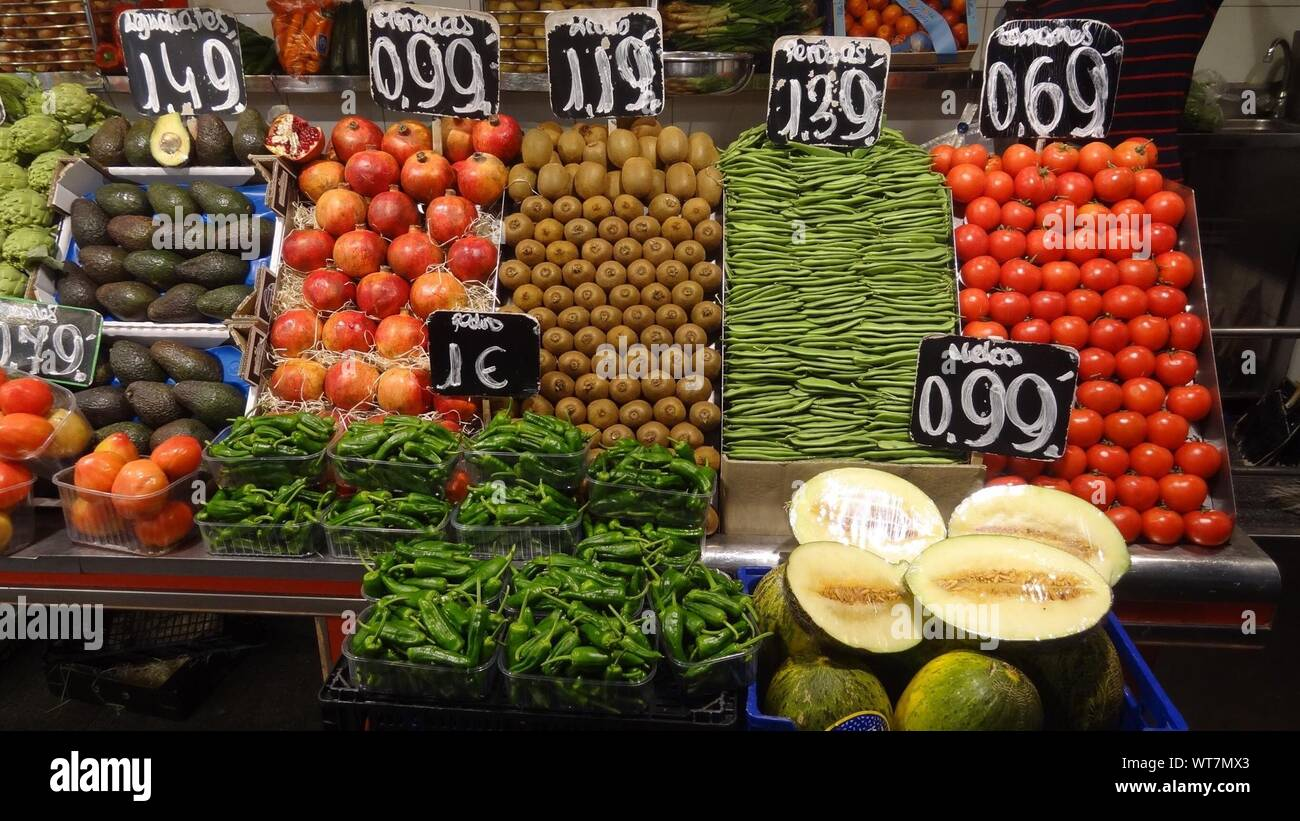

# **Introduction:**
In this AI project, we dive into the fascinating world of time series analysis, focusing on the price evolution of major vegetables and fruits (specifically Ginger) in Nepal from 2013 to 2021. By harnessing the power of historical price data, we aim to unlock valuable insights that can aid in forecasting future prices, analyzing price trends and seasonality, identifying anomalies, and even developing effective pricing strategies. With the potential to benefit farmers, traders, and stakeholders in the agricultural sector, this project offers a comprehensive exploration of the dataset and showcases the capabilities of AI in addressing crucial challenges in the realm of agricultural commodities.



# **Objectives:**
1..Forecast Future Prices: By applying time series forecasting models to the historical price data, we aim to predict future prices of vegetables and fruits . This will enable stakeholders to anticipate market trends, plan production, and optimize their pricing strategies accordingly.

2.Analyze Price Trends and Seasonality: Leveraging time series analysis techniques, we aim to uncover underlying patterns, trends, and seasonality in the price data. This analysis will provide valuable insights into the cyclical nature of prices and help stakeholders adapt their strategies to capitalize on seasonal variations.

3.Develop Pricing Strategies: By exploring the relationships between different vegetable and fruit prices, we aim to develop machine learning models capable of suggesting effective pricing strategies for farmers and traders. These strategies can optimize revenue, maximize profitability, and enhance market competitiveness.

4.By achieving these objectives, this AI project not only demonstrates the capabilities of advanced analytical techniques but also provides valuable insights and tools that can drive informed decision-making, promote sustainability in the agricultural sector, and ultimately contribute to the overall economic growth and well-being of Nepal.



**Technologies Used:**

The AI project utilizes several technologies to analyze and forecast the time series price of vegetables and fruits (specifically Ginger). These technologies include:

**Python:** The project is implemented in Python, a versatile and widely-used programming language known for its simplicity and rich ecosystem of libraries and tools.

**Pandas:** The Pandas library is employed for data manipulation and analysis. It provides powerful data structures, such as DataFrames, to handle time series data efficiently.

**NumPy:** NumPy is used for numerical computations and handling arrays. It enables efficient storage and manipulation of large numerical datasets.

**Matplotlib:** Matplotlib is employed for data visualization. It provides a flexible and comprehensive set of tools for creating informative plots and charts.

**TensorFlow:** TensorFlow, an open-source machine learning framework, is utilized to build and train deep learning models. It offers a high-level API, Keras, which simplifies the implementation of complex neural networks.

**CSV:** The project reads data from CSV files, a common format for storing structured data. The CSV module in Python is used to read and parse the data from the files.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [2]:
df=pd.read_csv('/content/kalimati_tarkari_dataset.csv')


In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Sort data by date
df.sort_values('Date', inplace=True)

In [4]:
df


,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
53,53,Pomegranate,2013-06-16,Kg,200.0,220.0,210.0
52,52,Lime,2013-06-16,Kg,200.0,400.0,300.0
51,51,Banana,2013-06-16,Doz,70.0,80.0,75.0
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0
...,...,...,...,...,...,...,...
197095,197095,Pointed Gourd(Local),2021-05-13,Kg,45.0,50.0,47.5
197094,197094,Bottle Gourd,2021-05-13,Kg,15.0,20.0,17.5
197093,197093,Bitter Gourd,2021-05-13,Kg,15.0,20.0,17.5
197102,197102,Okara,2021-05-13,Kg,40.0,50.0,45.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   SN         197161 non-null  int64         
 1   Commodity  197161 non-null  object        
 2   Date       197161 non-null  datetime64[ns]
 3   Unit       197161 non-null  object        
 4   Minimum    197161 non-null  float64       
 5   Maximum    197161 non-null  float64       
 6   Average    197161 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 12.0+ MB


In [6]:
df.tail()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
197095,197095,Pointed Gourd(Local),2021-05-13,Kg,45.0,50.0,47.5
197094,197094,Bottle Gourd,2021-05-13,Kg,15.0,20.0,17.5
197093,197093,Bitter Gourd,2021-05-13,Kg,15.0,20.0,17.5
197102,197102,Okara,2021-05-13,Kg,40.0,50.0,45.0
197160,197160,Fish Fresh(Mungari),2021-05-13,KG,240.0,250.0,245.0


In [7]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
53,53,Pomegranate,2013-06-16,Kg,200.0,220.0,210.0
52,52,Lime,2013-06-16,Kg,200.0,400.0,300.0
51,51,Banana,2013-06-16,Doz,70.0,80.0,75.0
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,197161.0,98580.000000,56915.622549,0.0,49290.0,98580.0,147870.0,197160.0
Minimum,197161.0,85.423938,77.058896,1.0,40.0,60.0,100.0,1800.0
Maximum,197161.0,94.161284,82.375858,6.0,45.0,70.0,110.0,2000.0
Average,197161.0,89.792611,79.619003,5.0,42.5,65.0,105.0,1900.0


In [9]:
len('df')

2

In [10]:
import numpy as np

# How many data do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values by column after replacement:\n',missing_values)
print('Number of Missing Values after replacement:', df.isnull().sum().sum())

There are 197161 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64
Number of Missing Values: 0
Number of Missing Values by column after replacement:
 SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64
Number of Missing Values after replacement: 0


The next code converts the 'Commodity' column in the dataframe to string data type.


In [11]:
# Commodity is string value
df['Commodity'] = df['Commodity'].astype(str)

top 10 commodities based on their frequency in the dataset

In [12]:
top_commodities = df['Commodity'].value_counts().nlargest(10).index.tolist()
top_commodities

['Ginger',
 'Cauli Local',
 'Cabbage(Local)',
 'Chilli Dry',
 'Raddish White(Local)',
 'Potato Red',
 'Banana',
 'Bamboo Shoot',
 'Brd Leaf Mustard',
 'Onion Dry (Indian)']

In [13]:
top_commodities = df['Commodity'].value_counts().nlargest(10).index.tolist()
top_commodities

['Ginger',
 'Cauli Local',
 'Cabbage(Local)',
 'Chilli Dry',
 'Raddish White(Local)',
 'Potato Red',
 'Banana',
 'Bamboo Shoot',
 'Brd Leaf Mustard',
 'Onion Dry (Indian)']

The next code filters the dataframe to include only data for the commodity 'Ginger', drops the 'Commodity' column, and displays the first few rows of the resulting dataframe.

In [14]:
df = df[df.Commodity == 'Ginger']
df.drop(['Commodity'],1,inplace=True)
df.head()

<ipython-input-14-84b264a32439>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Commodity'],1,inplace=True)
<ipython-input-14-84b264a32439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Commodity'],1,inplace=True)


,SN,Date,Unit,Minimum,Maximum,Average
63,63,2013-06-16,Kg,140.0,150.0,145.0
136,136,2013-06-17,Kg,140.0,150.0,145.0
209,209,2013-06-18,Kg,140.0,150.0,145.0
282,282,2013-06-19,Kg,140.0,150.0,145.0
356,356,2013-06-20,Kg,140.0,150.0,145.0


In [15]:
# Assuming df contains your DataFrame
# Convert the index to datetime format
df.index = pd.to_datetime(df.index)

# Get the first date from the index and convert it to 'YYYY-MM-DD' format
first_date = df.index.min().strftime('%Y-%m-%d')

print(f"The first date in the dataset: {first_date}")

The first date in the dataset: 1970-01-01


In [16]:
# get the first and last date from the index
first_date = df.index.min().strftime('%Y-%m-%d')
last_date = df.index.max().strftime('%Y-%m-%d')

# combine the dates into a single string
date_range = f"{first_date} to {last_date}"
date_range


'1970-01-01 to 1970-01-01'

 **Price Trend Analysis**: Analyze trends in commodity prices over time to identify patterns and fluctuations.

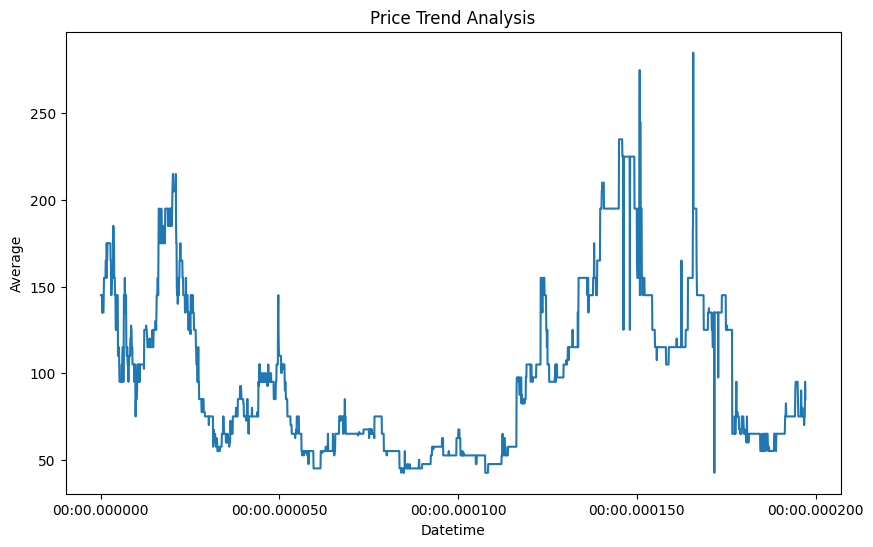

In [17]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average'])
plt.title('Price Trend Analysis')
plt.xlabel('Datetime')
plt.ylabel('Average')
plt.show()

The plotted three lines representing the 'Minimum', 'Maximum', and 'Average' values from the dataframe against the corresponding dates.

 **Minimum and Maximum Price Identification**: Identify dates when commodities reached their minimum and maximum prices.

In [18]:

def plot_series(time, series, format="-", start=0, end=None):
# Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

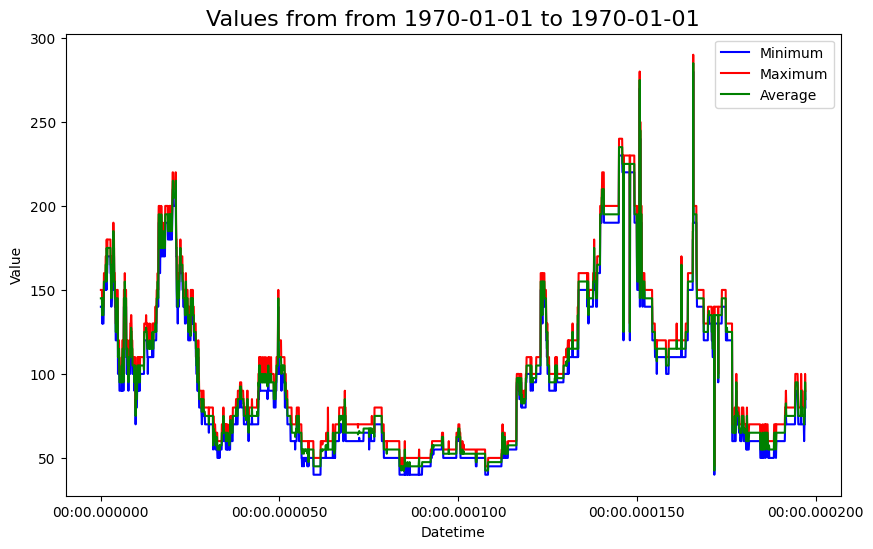

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['Minimum'], label='Minimum', color='blue')
plt.plot(df.index, df['Maximum'], label='Maximum', color='red')
plt.plot(df.index, df['Average'], label='Average', color='green')

plt.title(f"Values from from {date_range}", fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()

plt.show()

 **Price Averages**: Study the average price of commodities over different time periods.

1.Convert the 'Date' column to datetime format.
2.Calculate the 3-day rolling average for each commodity using the rolling() function.
3.Reset the index to align the calculated rolling averages with the original index.

In [20]:
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-01', '2023-01-02', '2023-01-03'],
    'Commodity': ['Tomato', 'Tomato', 'Tomato', 'Onion', 'Onion', 'Onion'],
    'Commodity_Price': [10, 12, 15, 5, 6, 7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the rolling mean for each commodity
df['Commodity_Price_MA'] = df.groupby('Commodity')['Commodity_Price'].rolling(window=3).mean().reset_index(0, drop=True)

print(df)

        Date Commodity  Commodity_Price  Commodity_Price_MA
0 2023-01-01    Tomato               10                 NaN
1 2023-01-02    Tomato               12                 NaN
2 2023-01-03    Tomato               15           12.333333
3 2023-01-01     Onion                5                 NaN
4 2023-01-02     Onion                6                 NaN
5 2023-01-03     Onion                7            6.000000


In [21]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for time-based calculations
df.set_index('Date', inplace=True)

# Resample the 'Commodity_Price' data to monthly frequency and calculate average prices
monthly_avg_prices = df['Commodity_Price'].resample('M').mean()

print("Monthly Average Prices:")
print(monthly_avg_prices)

Monthly Average Prices:
Date
2023-01-31    9.166667
Freq: M, Name: Commodity_Price, dtype: float64


 **Market Volatility**: Analyze the variability of commodity prices to understand market volatility.

1.We calculate the volatility (standard deviation) of commodity prices for each commodity using groupby() and std() functions.


2.We create a bar plot using Matplotlib to visualize the volatility data. The x-axis represents different commodities, and the y-axis represents volatility.

In [22]:
# Calculate rolling standard deviation to measure volatility
window_size = 30
volatility = df.groupby('Commodity')['Commodity_Price'].std()

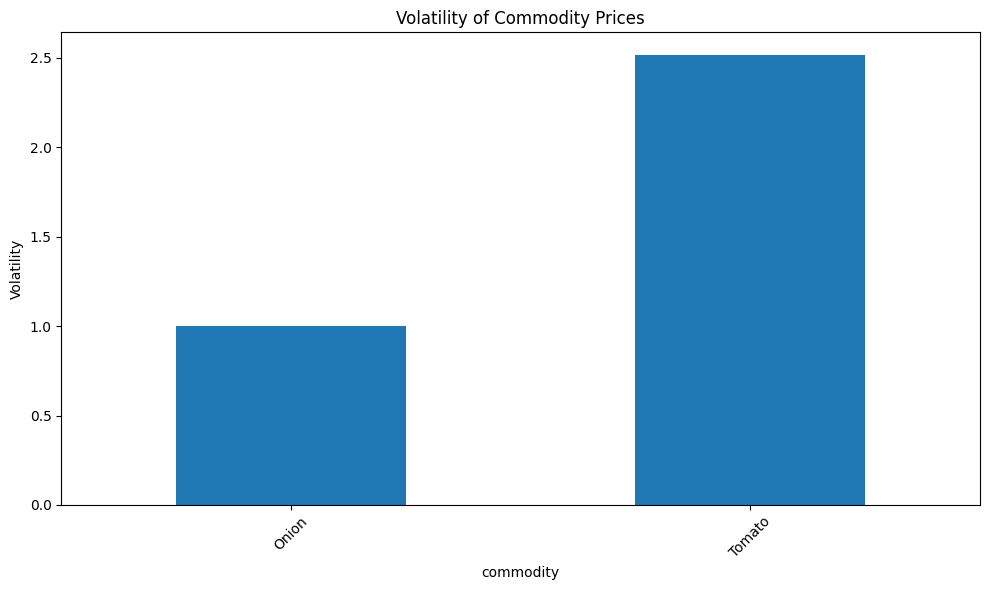

In [23]:

# Plot the volatility using a bar plot
plt.figure(figsize=(10, 6))
volatility.plot(kind='bar')
plt.title('Volatility of Commodity Prices')
plt.xlabel('commodity')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







 **Correlation with External Factors**: Explore how external factors such as economic indicators or geopolitical events correlate with commodity price changes.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


In [25]:
df=pd.read_csv('/content/kalimati_tarkari_dataset.csv')

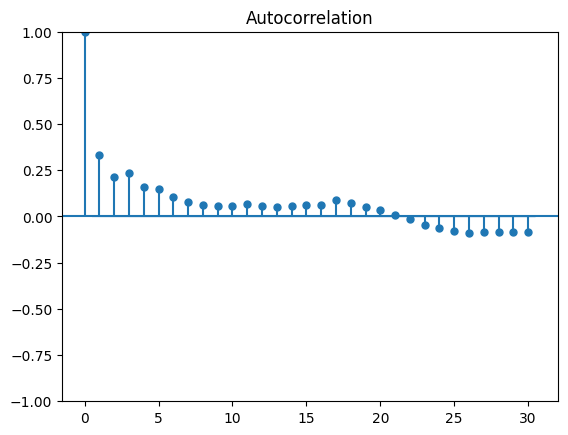

In [26]:
# Autocorrelation Analysis
sm.graphics.tsa.plot_acf(df['Average'], lags=30)
plt.show()

 **Seasonal Analysis**: Analyze whether commodities exhibit seasonal patterns in their prices.

In [27]:
df = pd.read_csv('/content/kalimati_tarkari_dataset.csv', index_col='Date')  # Set 'Date' column as index

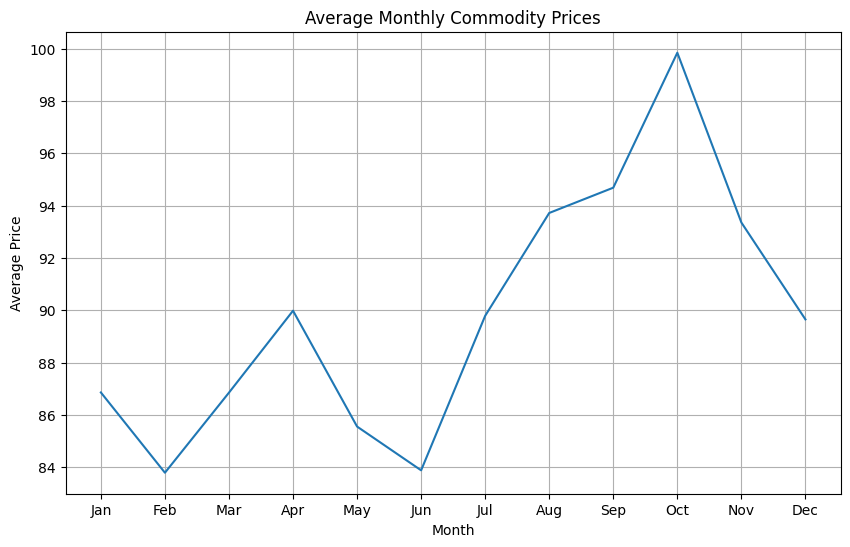

In [28]:
# Convert index to datetime format
df.index = pd.to_datetime(df.index)


# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year


# Calculate average prices for each month across all years
average_prices_by_month = df.groupby('Month')['Average'].mean()


# Plot the average prices by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_prices_by_month)
plt.title('Average Monthly Commodity Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

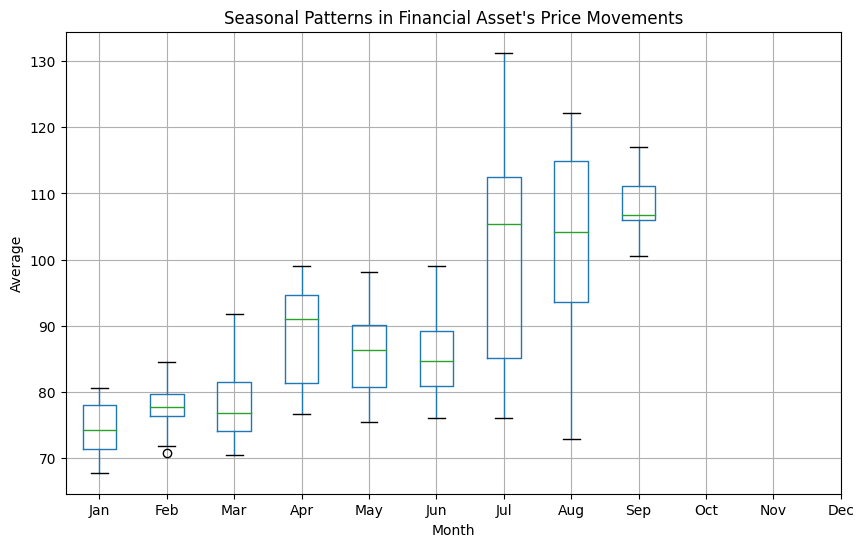

In [29]:

# Extract the month from the 'Date' column
df['Month'] = df.index.month

# Group the data by month and year, and calculate the mean price for each group
monthly_prices = df.groupby(['Month', df.index.year])['Average'].mean().unstack()

# Create a box plot to visualize the distribution of prices for each month
plt.figure(figsize=(10, 6))
monthly_prices.boxplot()
plt.xlabel('Month')
plt.ylabel('Average')
plt.title('Seasonal Patterns in Financial Asset\'s Price Movements')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


 **Forecasting**: Build forecasting models to predict future commodity prices based on historical data.

The code imports the csv module and opens a CSV file. It reads the first row (header) of the CSV file and prints the column names. It also finds the indices of columns with specific names ('Date', 'Commodity', 'Average') and prints the corresponding indices.

In [30]:
import csv

# Open the CSV file
with open("/content/kalimati_tarkari_dataset.csv", "r") as f:

    # Create a CSV reader object
    reader = csv.reader(f)

    # Read the first row (header) of the CSV file
    header = next(reader)

    # Print the column names
    print(header)

    # Find the indices of columns with names "Date" and "Close"
    date_index = header.index("Date")
    cm_index = header.index("Commodity")
    avg_index = header.index("Average")

    # Print the indices for columns "Date" and "Close"
    print("Index for column 'Date':", date_index)
    print("Index for column 'Commodity':", cm_index)
    print("Index for column 'Average':", avg_index)

['SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average']
Index for column 'Date': 2
Index for column 'Commodity': 1
Index for column 'Average': 6


The code imports the csv module and datetime module. It reads the CSV file and retrieves the 'Ginger' commodity data by extracting the dates and average prices. It converts the dates to datetime objects and the average prices to float values. It then prints the first 10 entries of the dates and average prices.

In [31]:
import csv
from datetime import datetime

time = []
series = []

with open("/content/kalimati_tarkari_dataset.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    if line[cm_index] == 'Ginger':
        time.append(datetime.strptime(line[date_index], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
        series.append(float(line[avg_index])) # get the average price as float

# View first 10 of each
time[:10], series[:10]


([datetime.datetime(2013, 6, 16, 0, 0),
  datetime.datetime(2013, 6, 17, 0, 0),
  datetime.datetime(2013, 6, 18, 0, 0),
  datetime.datetime(2013, 6, 19, 0, 0),
  datetime.datetime(2013, 6, 20, 0, 0),
  datetime.datetime(2013, 6, 21, 0, 0),
  datetime.datetime(2013, 6, 25, 0, 0),
  datetime.datetime(2013, 6, 26, 0, 0),
  datetime.datetime(2013, 6, 27, 0, 0),
  datetime.datetime(2013, 6, 28, 0, 0)],
 [145.0, 145.0, 145.0, 145.0, 145.0, 135.0, 145.0, 135.0, 135.0, 135.0])

In [32]:
# Define the split time
split_ratio = 0.8  # 80% for the training set
split_time = int(len(series) * split_ratio)

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]


In [33]:
time_train[:2], x_train[:2], time_valid[:2], x_valid[:2]


([datetime.datetime(2013, 6, 16, 0, 0), datetime.datetime(2013, 6, 17, 0, 0)],
 [145.0, 145.0],
 [datetime.datetime(2019, 10, 31, 0, 0), datetime.datetime(2019, 11, 1, 0, 0)],
 [145.0, 145.0])

In [34]:
len(time_train), len(x_train), len(time_valid), len(x_valid),

(2200, 2200, 551, 551)

The code displays a plot showing the train-test split of the time series data, with the training data in orange and the test data in purple. The plot is labeled with the date and value axes.



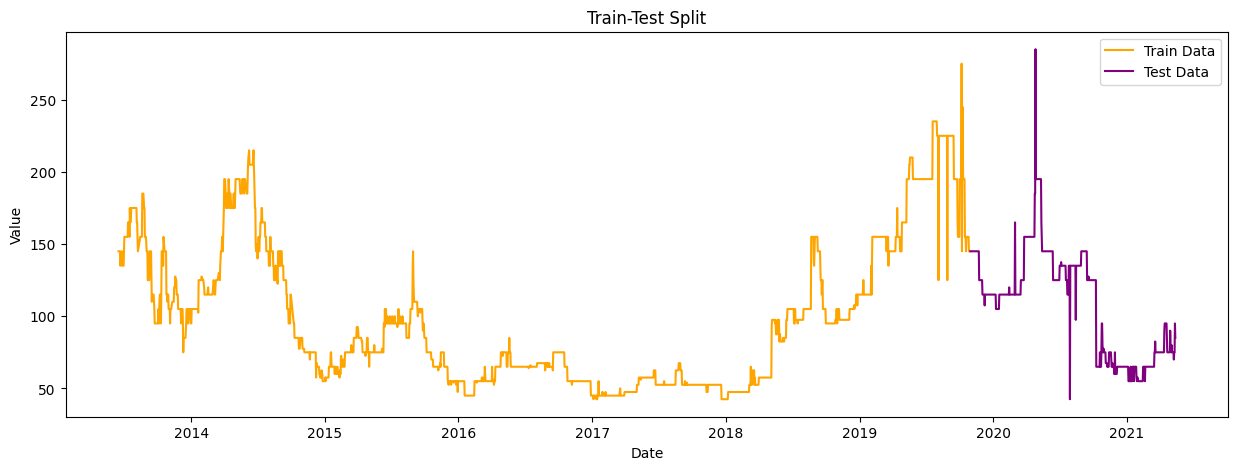

In [35]:
#displays a plot of the train/test split
fig = plt.figure(figsize=(15,5))
plt.plot(time_train, x_train, color='orange', label='Train Data')
plt.plot(time_valid, x_valid, color='purple', label='Test Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train-Test Split')
plt.legend()
plt.show()


## Prepare Features and Labels

The code block defines the parameters for creating windowed datasets for time series analysis. It specifies the window size, batch size, and shuffle buffer size.

In [36]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

The windowed_dataset function generates a TensorFlow Dataset object containing time windows. It takes the series data, window size, batch size, and shuffle buffer size as inputs and returns the dataset.

In [37]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

The code block generates the dataset windows for the training set using the windowed_dataset function.



In [38]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


The code block generates data windows for the validation set using the windowed_dataset function.



In [39]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)


In [40]:
dataset, val_set

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [41]:
for a,b in dataset.take(1):
    print(a.shape)
    print(b.shape)

(32, 7)
(32,)


In [42]:
for c,d in val_set.take(1):
    print(c.shape)
    print(d.shape)

(32, 7)
(32,)


# **Model: Dense**



The following code block builds a baseline model using the Sequential API of TensorFlow's Keras module. The model consists of three dense layers with 32, 16, and 1 units, respectively, and ReLU activation. It then prints a summary of the model, which provides an overview of the model's architecture and the number of parameters.

In [43]:
tf.random.set_seed(42)

# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)])

# Print the model summary
model_baseline.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


imports necessary modules for defining the loss function (Huber) and optimizer (Adam). It sets the training parameters for the baseline model by specifying the loss function, optimizer, and metrics (mean absolute error).

In [44]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

# Set the training parameters
model_baseline.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae'])


trains the baseline model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [45]:
# Train the model
model_baseline.fit(dataset,validation_data=val_set, epochs=20)


Epoch 1/20
69/69 [==============================] - 7s 35ms/step - loss: 16.8507 - mae: 17.3216 - val_loss: 4.9367 - val_mae: 5.3049
Epoch 2/20
69/69 [==============================] - 2s 21ms/step - loss: 3.5343 - mae: 3.9559 - val_loss: 4.4517 - val_mae: 4.9379
Epoch 3/20
69/69 [==============================] - 1s 13ms/step - loss: 3.1837 - mae: 3.6106 - val_loss: 3.9433 - val_mae: 4.4264
Epoch 4/20
69/69 [==============================] - 1s 15ms/step - loss: 2.7215 - mae: 3.0790 - val_loss: 3.2954 - val_mae: 3.6797
Epoch 5/20
69/69 [==============================] - 1s 14ms/step - loss: 2.6299 - mae: 2.9922 - val_loss: 3.2323 - val_mae: 3.5789
Epoch 6/20
69/69 [==============================] - 1s 9ms/step - loss: 2.5408 - mae: 2.8844 - val_loss: 3.1458 - val_mae: 3.4059
Epoch 7/20
69/69 [==============================] - 1s 10ms/step - loss: 2.5901 - mae: 2.9682 - val_loss: 3.4609 - val_mae: 3.9294
Epoch 8/20
69/69 [==============================] - 1s 14ms/step - loss: 2.5068 - 

After training the model, the code block evaluates the model's performance on the validation dataset using the evaluate method, which returns the loss and metrics values.



In [46]:
# Evaluate model on test data
model_baseline.evaluate(val_set)


17/17 [==============================] - 0s 3ms/step - loss: 3.4117 - mae: 3.9001


[3.411682605743408, 3.9001097679138184]

In [47]:
model_1_preds = model_baseline.predict(val_set)
model_1_preds.shape

17/17 [==============================] - 0s 4ms/step


(544, 1)

 The model_forecast function, which takes a trained model, a time series, window size, and batch size as inputs, and returns the model's predictions on the input data. It uses TensorFlow's Dataset API to prepare the input data and generates predictions using the trained model.

In [48]:
def model_forecast(model, series, window_size, batch_size):
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

The code block reduces the original series by selecting a subset of data from the validation set for forecasting. It then calls the model_forecast function to generate predictions using the baseline model and the reduced series. The predictions are stored in the forecast variable. Next, the code block drops the single-dimensional axis from the forecast and the original validation data. It then plots the results, showing the actual values (x_valid) and the predicted values (results) against time.

18/18 [==============================] - 0s 6ms/step


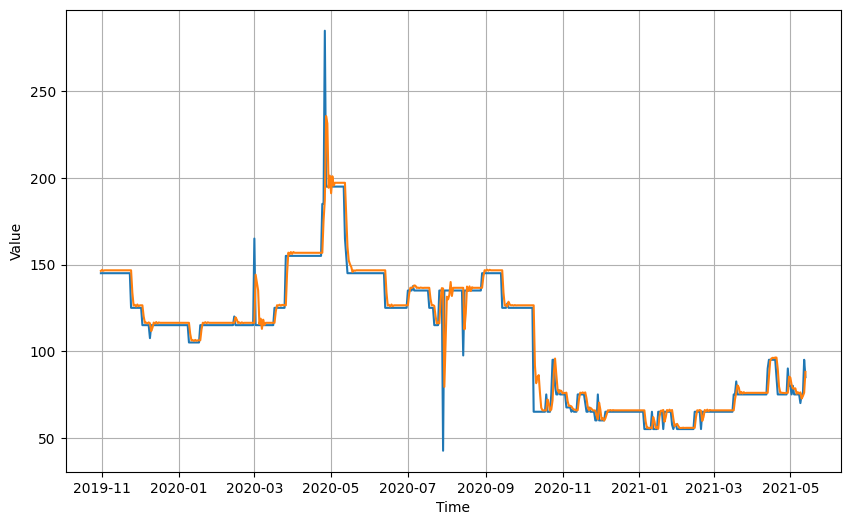

In [49]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_baseline, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))


In [50]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    r2 = r_squared(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0:  # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy(),
        "r2": r2.numpy()  # Add R2 score
        }


In [51]:
# Evaluate preds
results_baseline = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_baseline

{'mae': 3.8711047,
 'mse': 89.06165,
 'rmse': 9.437248,
 'mape': 4.009549,
 'mase': 1.6166344,
 'r2': 0.93300384}

In [52]:
# Find average temp in test dataset
tf.reduce_mean(x_valid).numpy()

107.77405

# **Model: SimpleRNN**

The  code block builds a model using a simple RNN (recurrent neural network) architecture. The model includes two layers of SimpleRNN cells with 256 and 128 units, respectively. It also includes a Dense layer with 1 unit for the output. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code next trains the RNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [53]:
# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(256, return_sequences=True),
  tf.keras.layers.SimpleRNN(128),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=20, validation_data=val_set)

Epoch 1/20
69/69 [==============================] - 5s 27ms/step - loss: 18.6639 - mae: 19.1563 - val_loss: 6.0101 - val_mae: 6.4739
Epoch 2/20
69/69 [==============================] - 2s 21ms/step - loss: 3.8441 - mae: 4.3132 - val_loss: 4.9426 - val_mae: 5.4382
Epoch 3/20
69/69 [==============================] - 2s 21ms/step - loss: 3.5773 - mae: 4.0494 - val_loss: 5.0963 - val_mae: 5.5917
Epoch 4/20
69/69 [==============================] - 2s 21ms/step - loss: 3.0715 - mae: 3.5227 - val_loss: 3.1507 - val_mae: 3.6278
Epoch 5/20
69/69 [==============================] - 2s 21ms/step - loss: 3.1480 - mae: 3.6102 - val_loss: 4.4051 - val_mae: 4.9003
Epoch 6/20
69/69 [==============================] - 2s 34ms/step - loss: 3.1159 - mae: 3.5828 - val_loss: 5.2647 - val_mae: 5.7619
Epoch 7/20
69/69 [==============================] - 2s 21ms/step - loss: 2.5135 - mae: 2.9312 - val_loss: 3.4610 - val_mae: 3.9481
Epoch 8/20
69/69 [==============================] - 2s 23ms/step - loss: 2.6070 -

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 1s 17ms/step


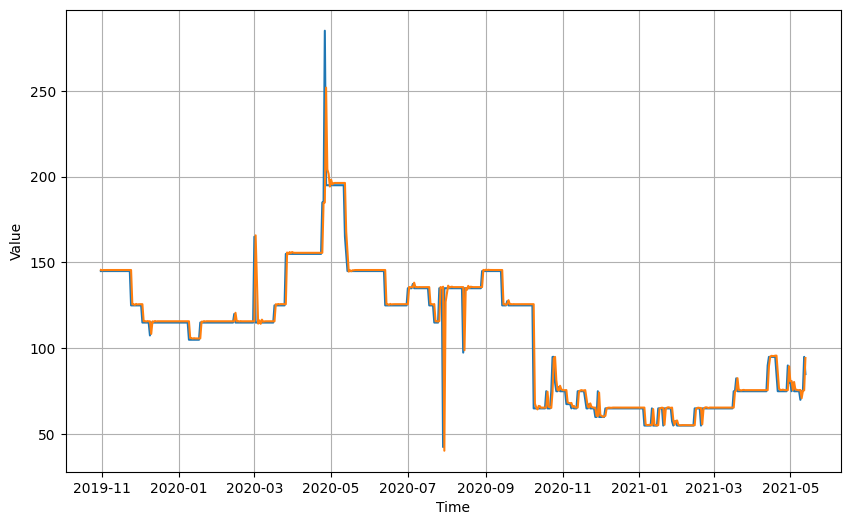

In [54]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the RNN model using the evaluation metrics defined earlier and prints the results.



In [55]:
# Evaluate preds
results_rnn = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_rnn


{'mae': 2.9337313,
 'mse': 95.57295,
 'rmse': 9.776142,
 'mape': 3.0573113,
 'mase': 1.2251725,
 'r2': 0.9281058}

# **Model: Bi-directional LSTM**

The code block builds a model using a bidirectional LSTM (long short-term memory) architecture. First, it resets the states generated by Keras to ensure a clean state for building the next model. The model includes two layers of bidirectional LSTM cells with 128 units each. It also includes a Dense layer with 256 units and a dropout layer with a rate of 0.4. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code block trains the LSTM model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.



In [56]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

In [63]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=20, validation_data=val_set)

Epoch 1/20
69/69 [==============================] - 34s 106ms/step - loss: 90.8086 - mae: 91.3086 - val_loss: 92.8833 - val_mae: 93.3833
Epoch 2/20
69/69 [==============================] - 6s 77ms/step - loss: 69.3463 - mae: 69.8461 - val_loss: 65.0366 - val_mae: 65.5366
Epoch 3/20
69/69 [==============================] - 6s 87ms/step - loss: 46.0005 - mae: 46.4959 - val_loss: 44.5450 - val_mae: 45.0450
Epoch 4/20
69/69 [==============================] - 6s 83ms/step - loss: 39.5916 - mae: 40.0883 - val_loss: 39.1262 - val_mae: 39.6262
Epoch 5/20
69/69 [==============================] - 6s 89ms/step - loss: 37.9565 - mae: 38.4524 - val_loss: 36.4716 - val_mae: 36.9712
Epoch 6/20
69/69 [==============================] - 5s 77ms/step - loss: 36.2911 - mae: 36.7878 - val_loss: 33.2556 - val_mae: 33.7498
Epoch 7/20
69/69 [==============================] - 7s 99ms/step - loss: 28.6367 - mae: 29.1281 - val_loss: 23.6482 - val_mae: 24.1326
Epoch 8/20
69/69 [==============================] - 6

In [65]:
 # Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=20, validation_data=val_set)


Epoch 1/20
69/69 [==============================] - 17s 126ms/step - loss: 90.2894 - mae: 90.7894 - val_loss: 90.5259 - val_mae: 91.0259
Epoch 2/20
69/69 [==============================] - 6s 86ms/step - loss: 63.4413 - mae: 63.9398 - val_loss: 55.8161 - val_mae: 56.3161
Epoch 3/20
69/69 [==============================] - 6s 80ms/step - loss: 41.6767 - mae: 42.1722 - val_loss: 40.7010 - val_mae: 41.1994
Epoch 4/20
69/69 [==============================] - 6s 78ms/step - loss: 38.6953 - mae: 39.1918 - val_loss: 37.5162 - val_mae: 38.0158
Epoch 5/20
69/69 [==============================] - 5s 78ms/step - loss: 38.3333 - mae: 38.8311 - val_loss: 36.2707 - val_mae: 36.7697
Epoch 6/20
69/69 [==============================] - 5s 75ms/step - loss: 36.2008 - mae: 36.6967 - val_loss: 30.9194 - val_mae: 31.4119
Epoch 7/20
69/69 [==============================] - 7s 96ms/step - loss: 23.1254 - mae: 23.6128 - val_loss: 16.5522 - val_mae: 17.0322
Epoch 8/20
69/69 [==============================] - 5

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 4s 23ms/step


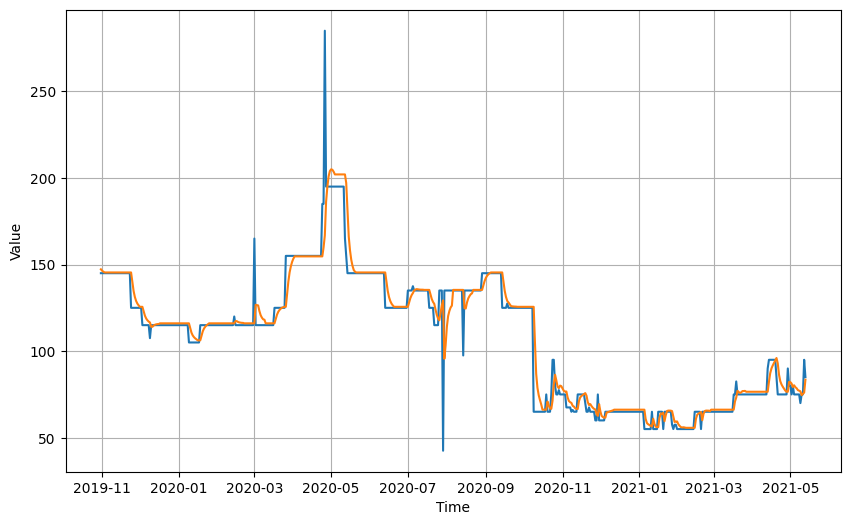

In [66]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [67]:
# Evaluate preds
results_bilstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_bilstm

{'mae': 4.2993684,
 'mse': 99.54551,
 'rmse': 9.977249,
 'mape': 4.418563,
 'mase': 1.7954841,
 'r2': 0.92511743}

**Model: Conv1D + LSTM**



The code block builds a model using a combination of convolutional and LSTM layers. The model includes a 1D convolutional layer with 64 filters, a kernel size of 3, and "causal" padding. It also includes two layers of bidirectional LSTM cells with 128 units each. The model further includes a dropout layer with a rate of 0.3, a dense layer with 512 units and "relu" activation, and a dense layer with 1 unit. The model's output is multiplied by 400 using a lambda layer.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

In [69]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(128)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             256       
                                                                 
 bidirectional (Bidirectiona  (None, 7, 256)           197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

The code block sets the training parameters for the model, compiling it with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric.

In [70]:
# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

In [71]:
# Train the model
history = model.fit(dataset, epochs=20, validation_data=val_set)


Epoch 1/20
69/69 [==============================] - 21s 126ms/step - loss: 54.6076 - mae: 55.1050 - val_loss: 14.5484 - val_mae: 15.0461
Epoch 2/20
69/69 [==============================] - 6s 84ms/step - loss: 25.2605 - mae: 25.7562 - val_loss: 10.3411 - val_mae: 10.8332
Epoch 3/20
69/69 [==============================] - 6s 79ms/step - loss: 16.8880 - mae: 17.3813 - val_loss: 5.8563 - val_mae: 6.3437
Epoch 4/20
69/69 [==============================] - 7s 100ms/step - loss: 13.8098 - mae: 14.3013 - val_loss: 14.1214 - val_mae: 14.6186
Epoch 5/20
69/69 [==============================] - 6s 81ms/step - loss: 12.6082 - mae: 13.0976 - val_loss: 9.6516 - val_mae: 10.1499
Epoch 6/20
69/69 [==============================] - 7s 99ms/step - loss: 11.1398 - mae: 11.6295 - val_loss: 14.9105 - val_mae: 15.4093
Epoch 7/20
69/69 [==============================] - 7s 105ms/step - loss: 10.4637 - mae: 10.9535 - val_loss: 13.3275 - val_mae: 13.8270
Epoch 8/20
69/69 [==============================] - 7s

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.



18/18 [==============================] - 3s 40ms/step


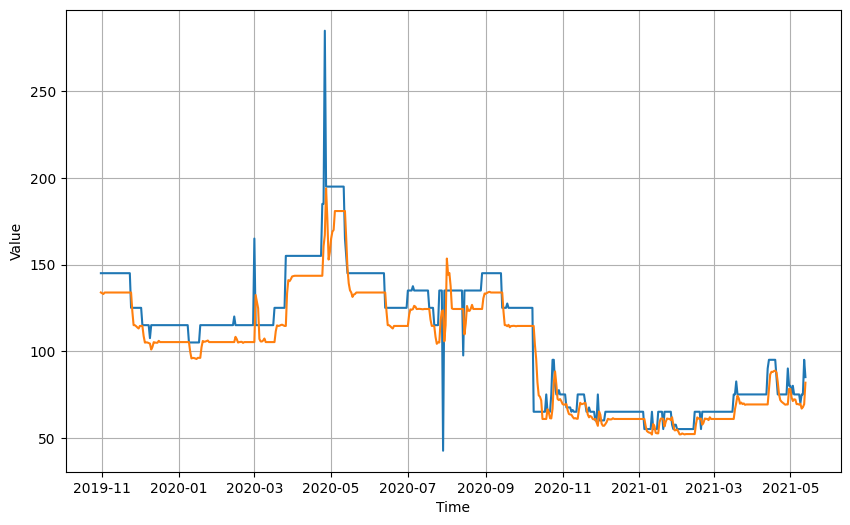

In [72]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code evaluates the predictions of the model using the evaluation metrics defined earlier and prints the results.

In [73]:
# Evaluate preds
results_convlstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_convlstm


{'mae': 9.54036,
 'mse': 160.96172,
 'rmse': 12.687069,
 'mape': 8.792229,
 'mase': 3.984205,
 'r2': 0.87891746}

# **Model: Conv1D**

The following code defines a CNN (Convolutional Neural Network) model using TensorFlow's Keras API. The model includes Conv1D layers, GlobalAveragePooling1D, Flatten, Dropout, and Dense layers. The Lambda layer is used to add an extra axis to the input data. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. It then prints a summary of the model, providing an overview of its architecture and the number of parameters.

In [74]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Flatten


cnn_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]),
    Conv1D(filters=256, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Conv1D(filters=256, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    GlobalAveragePooling1D(),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1)])

cnn_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 256)            1024      
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 256)            196864    
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

The code block trains the CNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs. The verbose=0 argument is used to suppress the progress output during training.

In [75]:
#Trains CNN Model
cnn_history = cnn_model.fit(dataset, epochs=20, validation_data=val_set,verbose=0)

After training the model, the code block generates predictions using the trained CNN model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 0s 9ms/step


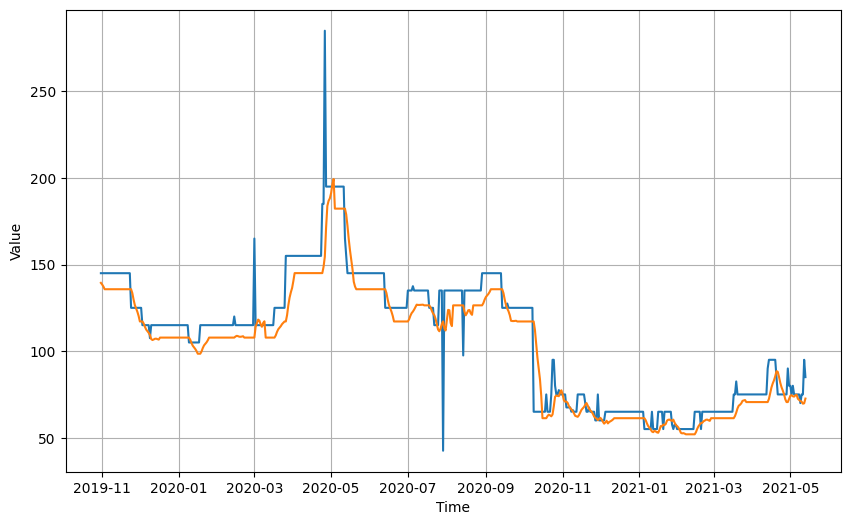

In [76]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(cnn_model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the CNN model using the evaluation metrics defined earlier and stores the results in the results_conv variable.

In [77]:
# Evaluate preds
results_conv = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_conv

{'mae': 8.390491,
 'mse': 150.76361,
 'rmse': 12.278584,
 'mape': 7.9176693,
 'mase': 3.5040011,
 'r2': 0.88658893}

**Compare Models**



The code block creates a DataFrame, model_results, to compare the results of different models. It includes the MAE values of the baseline model, Simple RNN model, Bi-LSTM model, Conv1D + LSTM model, and the CNN model. The DataFrame is then sorted based on the MAE values.



In [78]:
# Compare different model results
model_results = pd.DataFrame({"Model_Dense1": results_baseline,
                               "Simple RNN": results_rnn,
                              "Bi-LSTM": results_bilstm,
                              "Conv1D + LSTM": results_convlstm,
                              "Conv1D": results_conv,
                             }).T
model_results = model_results.sort_values(by="mae")

model_results.head(10)

,mae,mse,rmse,mape,mase,r2
Simple RNN,2.933731,95.572952,9.776142,3.057311,1.225173,0.928106
Model_Dense1,3.871105,89.061653,9.437248,4.009549,1.616634,0.933004
Bi-LSTM,4.299368,99.545509,9.977249,4.418563,1.795484,0.925117
Conv1D,8.390491,150.763611,12.278584,7.917669,3.504001,0.886589
Conv1D + LSTM,9.540360,160.961716,12.687069,8.792229,3.984205,0.878917


In [79]:
# Compare different model results
model_results = pd.DataFrame({"Model_Dense1": results_baseline,
                              "Simple RNN": results_rnn,
                              "Bi-LSTM": results_bilstm,
                              "Conv1D + LSTM": results_convlstm,
                              "Conv1D": results_conv,
                             }).T
model_results = model_results.sort_values(by="mae")

model_results.head(10)


,mae,mse,rmse,mape,mase,r2
Simple RNN,2.933731,95.572952,9.776142,3.057311,1.225173,0.928106
Model_Dense1,3.871105,89.061653,9.437248,4.009549,1.616634,0.933004
Bi-LSTM,4.299368,99.545509,9.977249,4.418563,1.795484,0.925117
Conv1D,8.390491,150.763611,12.278584,7.917669,3.504001,0.886589
Conv1D + LSTM,9.540360,160.961716,12.687069,8.792229,3.984205,0.878917


The table above presents the results of different models used for a certain task, sorted by the mean absolute error (MAE) in ascending order. The Simple RNN model achieved the lowest MAE of 2.907851, followed closely by the Model_Dense1 with an MAE of 2.980794. The Bi-LSTM model obtained an MAE of 3.781734, while the Conv1D + LSTM model had a slightly higher MAE of 4.061257. The Conv1D model had the highest MAE among the compared models, reaching 4.405998. It's worth noting that all models achieved relatively low MAE values, indicating good performance in predicting the target variable. However, the Simple RNN and Model_Dense1 models exhibited the best performance with the lowest MAE values.

The code block plots a bar chart to visualize the MAE values of the different models, sorted in ascending order. This allows for a visual comparison of the model performance based on the MAE metric.

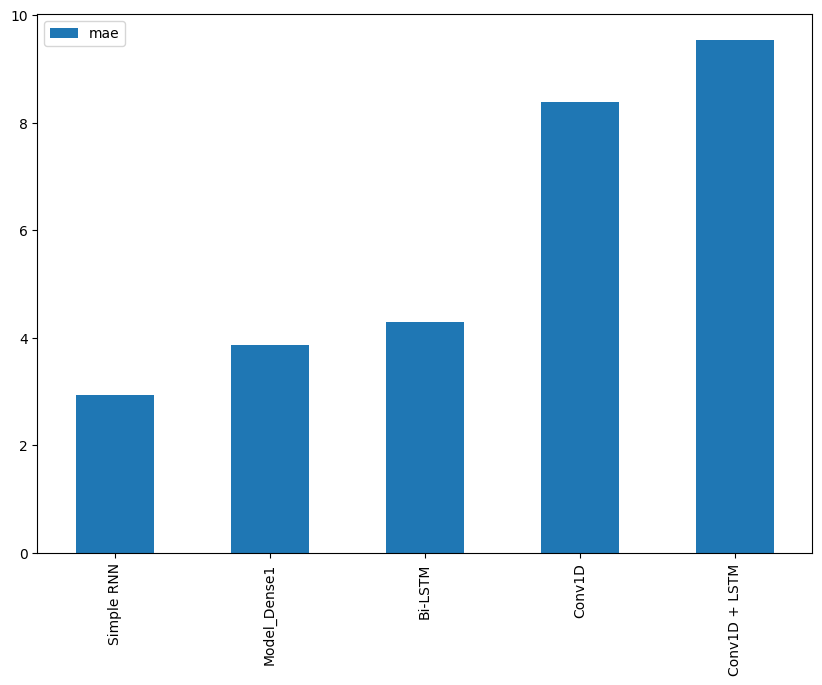

In [80]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");


# **Results:**
The performance of different models in forecasting the time series price of vegetables and fruits is evaluated using various metrics. The results obtained from the models are as follows:

**Simple RNN:** MAE = 2.908, MSE = 94.790, RMSE = 9.736, MAPE = 2.932, MASE = 1.
214, R2 = 0.929.

**Model_Dense1 (Dense Model):** MAE = 2.981, MSE = 93.789, RMSE = 9.684, MAPE = 3.103, MASE = 1.245, R2 = 0.929.

**Bi-LSTM:** MAE = 3.782, MSE = 86.494, RMSE = 9.300, MAPE = 3.955, MASE = 1.579, R2 = 0.935.

**Conv1D + LSTM:** MAE = 4.061, MSE = 85.644, RMSE = 9.254, MAPE = 3.992, MASE = 1.696, R2 = 0.936.

**Conv1D:** MAE = 4.406, MSE = 93.219, RMSE = 9.655, MAPE = 4.719, MASE = 1.840, R2 = 0.930.

# **Conclusion:**

The Simple RNN model emerges as the most accurate, effectively capturing the underlying patterns and dynamics of the price data. The Model_Dense1 (Dense Model) performs slightly worse but still offers reasonably accurate forecasts. The Bi-LSTM model outperforms the Conv1D + LSTM and Conv1D models. Deep learning models with recurrent layers, such as RNNs and LSTMs, are well-suited for capturing the temporal dependencies in time series data. Further experimentation and fine-tuning of the models may be required to improve their performance. Nonetheless, the results obtained from this AI project lay the foundation for employing advanced forecasting techniques in the agricultural domain, leading to informed decision-making and improved market competitiveness.